# Machine Learning - Regression example

Import necessary libraries <br><br>
Exploratory Data Analysis <br>
&emsp;Create a correlation matrix to see how variables are related<br>
&emsp;Visualize data using histograms, boxplots and scatter plots<br><br>
Data Preprocessing <br>
&emsp;Drop missing Values <br><br>
Split your dataset into train-test set <br>
Normalise the dataset <br>
Train the model on trainset<br>
Evaluate the trained Model on test set: <br>

https://www.kaggle.com/code/data13/predicting-house-prices-with-linear-regression/notebook



In [ ]:
import numpy as np 
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import seaborn as sns

In [ ]:
# load the datasets into dataframe
df = pd.read_csv('data_houses.csv', index_col=0)
df.head()

In [ ]:
print('No. of records in dataset: ', len(df.index))
print('No. of columns in dataset: ', len(df.columns))



###Check for missing values

In [ ]:
print ('Total missing values in set', sum(df.isna().sum()))

In [ ]:
df = df.select_dtypes(include = [np.number])
df.head()

In [ ]:
df.dropna(inplace=True, axis = 0)
print ('Total missing values', sum(df.isna().sum()))
df.head()

In [ ]:
plt.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea (Above grade "ground" living area square feet)')

In [ ]:
plt.scatter(x = df['GarageArea'], y = df['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')

In [ ]:
sns.heatmap(df.corr())

In [ ]:
#df = df[df['GrLivArea'] < 4500]

In [ ]:
X = df.drop(['SalePrice'], axis = 1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
minmax = MinMaxScaler()

X_train = minmax.fit_transform(X_train)
X_test = minmax.fit_transform(X_test)


In [ ]:
lr = linear_model.LinearRegression()

In [ ]:
model = lr.fit(X_train, y_train)
# make predictions based on model
predictions = model.predict(X_test)

In [ ]:
print ('MAE is:', mean_absolute_error(y_test, predictions))
print ('MSE is:', mean_squared_error(y_test, predictions))
print ('RMSE is:', sqrt(mean_squared_error(y_test, predictions)))

In [ ]:
plt.scatter(predictions, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

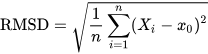

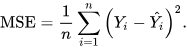

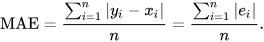

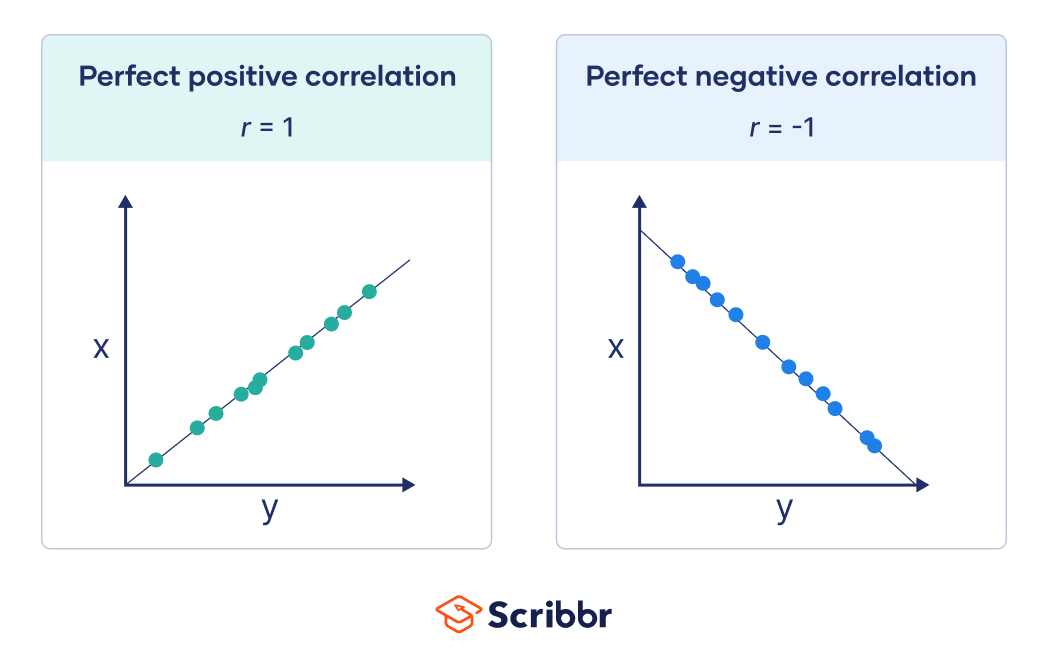